# Importing the Python 3 libraries

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import random
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

%matplotlib inline
random.seed(123)

# Import data from the file

In [24]:
original_data = pd.read_csv('./mushrooms.csv')
#our Data File is Loaded into 'data'
#lets check our loaded Data By Following Command
data.head(4)

type cap_shape cap_surface cap_color bruises odor gill_attachment  \
0    p         x           s         n       t    p               f   
1    e         x           s         y       t    a               f   
2    e         b           s         w       t    l               f   
3    p         x           y         w       t    p               f   

  gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   

  stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   

  ring_number ring_type spore_print_color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  

[4 rows x 23 columns]

In [25]:
data = original_data.copy()

# Data Analysis

In [26]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [27]:
habitat_dist = pd.value_counts(data['habitat'])
habitat_dist

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [29]:
class_dist = pd.value_counts(data['class'])
class_dist

e    4208
p    3916
Name: class, dtype: int64

In [30]:
print('%.2f%% of all the mushrooms are edible.' %(class_dist[0]/sum(class_dist)*100))

51.80% of all the mushrooms are edible.


### Pie plot for habitat

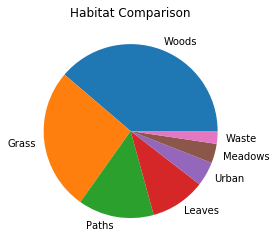

In [32]:
values = [habitat_dist[0],habitat_dist[1],habitat_dist[2],habitat_dist[3],habitat_dist[4],habitat_dist[5],habitat_dist[6]]
lb = ["Woods","Grass","Paths","Leaves","Urban","Meadows","Waste"]
plt.pie(values, labels=lb)
plt.title("Habitat Comparison")
plt.show()

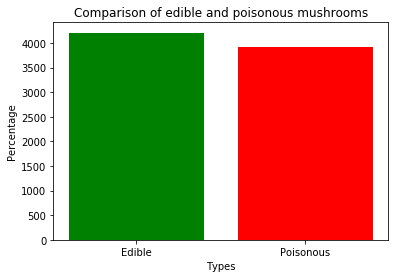

In [33]:
plt.bar(["Edible","Poisonous"], [class_dist[0],class_dist[1]], color=['green', 'red'])
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Comparison of edible and poisonous mushrooms")
plt.show()

# Data Purification

In [28]:
#To Get Full Information Of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [37]:
# In this data We can find some null data like '?'
#'veil-type' and 'stalk-root' has Some NaN values 
#so Delete these 2 columns from the data
data.drop('veil-type',axis=1,inplace=True)
data.drop('stalk-root',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8124 non-null int64
ring-type                   8124 non-null int64
spore-print-color           8

## String to numbers

In [34]:
#First Column Is Our Target
#It Has 2 Catagories ('p','e')
data['class'].unique()

array(['p', 'e'], dtype=object)

### Label Encoding

Here we can see that all the columns of the dataframe are of the object type so in order to properly analyze them, we need to encode the object values in each column with the appropriate numerical value.

In [36]:
#In machine learning, we need to transform every data into integer of float 
#because in ML, only numbers are the valid ones.
#Our given data is in the form of strings
#So lets convert all our data in 'numbers' form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])
data.head(5)

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

## Labels and features

In [38]:
# We need features and labels to perform Our Further Process
# Our Target Is 'class' Column
Y = data['class']
# Except 'class' column all are features 
data1 = data
data1.drop('class',axis=1,inplace=True)

In [39]:
data1.head(5)

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-surface-above-ring  \
0             0          1           4            0                         2   
1             0          0           4            0                         2   
2             0          0           5            0                         2   
3             0          1           5            0                         2   
4             1          0           4            1                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  
0           2            1          4                  2           3        5  
1           2            1          4                  3           2        1  
2           2            1          4                  3           2        3  
3           2            1          4                  2           3        5  
4           2            1          0                  3           0        1

In [41]:
# we done with droping 'class' column from data
# So Remained Data is belongs to 'features'
#now load data1 into 'X'
X = data1
X.head(5)

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-surface-above-ring  \
0             0          1           4            0                         2   
1             0          0           4            0                         2   
2             0          0           5            0                         2   
3             0          1           5            0                         2   
4             1          0           4            1                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  
0           2            1          4                  2           3        5  
1           2            1          4                  3           2        1  
2           2            1          4                  3           2        3  
3           2            1          4                  2           3        5  
4           2            1          0                  3           0        1

## Splitting the dataset

Before modelling and makingp predictions, we need to split the data into the traing set and test set. This way, we will train the data on one set and we will make predictions on other set.

- 70% - train set
- 30% - test set

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.33)

## Model selection and predicting

### Using Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

/home/techmirtz/anaconda3/envs/MushroomClassification/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9462886982469227

In [54]:
print('Accuracy of logistic regression model is %.2f%%.' %(model.score(X_test,y_test)*100))

Accuracy of logistic regression model is 94.63%.


### Using Support Vector Machine (SVM)

In [55]:
# Let's Take another model
from sklearn import svm
model = svm.SVC(kernel='rbf',gamma=0.3,C=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.999627004848937

In [56]:
print('Accuracy of SVM is %.2f%%.' %(model.score(X_test,y_test)*100))

Accuracy of SVM is 99.96%.


### Clearly, Support Vector Machine has more accuracy than the logistic regression.

## Functions to visualize Training & Test Set Results.

In [59]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

## Using the Artificial Neural Network (ANN)

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'